# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import math
from sklearn import metrics


df = pd.read_csv("bank-full_2016.csv")


2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [2]:
print("2.1) The Dimensions are: {0} \n".format(df.shape))

print("2.2) attributes in the table: \n\n {0} \n\n".format(df.axes))


print("2.3) the set of values in the outcome coloumn")
display(df["outcome"].unique())
print("the amount of times there is a yes {0} \n".format(len(df[df["outcome"] == "yes"])))
print("the amount of times there is a no {0} \n".format(len(df[df["outcome"] == "no"])))

print("2.4) the first 5 rows of the table: \n")
df.head(5)

2.1) The Dimensions are: (45211, 17) 

2.2) attributes in the table: 

 [RangeIndex(start=0, stop=45211, step=1), Index(['age', 'job', 'marital', 'education', 'default_credit', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'days_from_last_contact', 'previous_campaign_contacts',
       'previous_campaign_outcome', 'outcome'],
      dtype='object')] 


2.3) the set of values in the outcome coloumn


array(['no', 'yes'], dtype=object)

the amount of times there is a yes 5289 

the amount of times there is a no 39922 

2.4) the first 5 rows of the table: 



,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no


3) What is the data type of each attribute in the table?

In [3]:
df.dtypes

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object

## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

2) Change the type of the 'campaign' attribute to Categorical data.

In [4]:
display(df["contact"].unique())
df["isContactKnown"] = df["contact"] != "unknown" # this line is the answer for 1)
print("size of the new colomn is {0} \nthe categories are {1}".format(df["isContactKnown"].shape,df["isContactKnown"].unique()))

array(['unknown', 'cellular', 'telephone'], dtype=object)

size of the new colomn is (45211,) 
the categories are [False  True]


In [5]:
display(df["campaign"].unique())
df["campaign"] = df["campaign"].astype('category')#this line is the answer for 2)
df.dtypes

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

age                              int64
job                             object
marital                         object
education                       object
default_credit                  object
balance                          int64
housing_loan                    object
personal_loan                   object
contact                         object
day                              int64
month                           object
duration                         int64
campaign                      category
days_from_last_contact         float64
previous_campaign_contacts       int64
previous_campaign_outcome       object
outcome                         object
isContactKnown                    bool
dtype: object

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [6]:
df.describe() #nice!
#note that calculating those values only makes sense for integer-type attributes

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

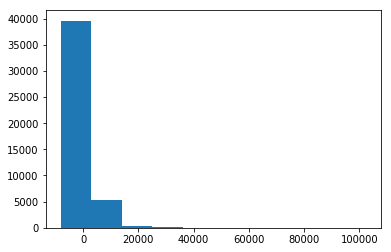

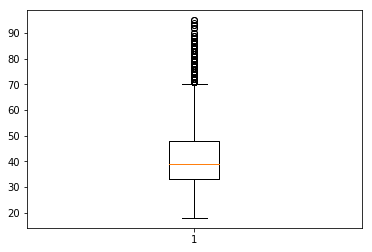

In [7]:
plt.hist(df["balance"])
plt.show()
plt.boxplot(df["age"])
plt.show()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

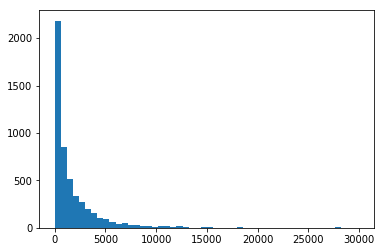

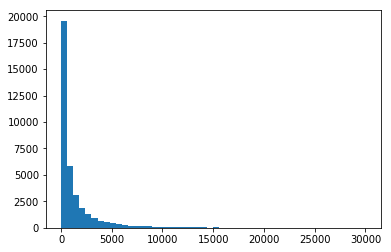

they have the similar distribution, but the negative outcome people are much more by numbers (i.e.there are more negative outcome people)


In [8]:
pos_outcome_ppl = df[(df["outcome"]=="yes")]
plt.hist(pos_outcome_ppl["balance"], bins = 50, range = [0,30000])
plt.show()

neg_outcome_ppl = df[(df["outcome"]=="no")]
plt.hist(neg_outcome_ppl["balance"], bins = 50, range = [0,30000])
plt.show()

print("they have the similar distribution, but the negative outcome people are much more by numbers (i.e.there are more negative outcome people)")

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [9]:
print("We did unique to all features and found that these have missing values: contact, days_from_last_contact, previous_campaign_contacts and previous_campaign_outcome")

We did unique to all features and found that these have missing values: contact, days_from_last_contact, previous_campaign_contacts and previous_campaign_outcome


2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [10]:
df2 = df[(df["isContactKnown"]==False)]
display(df2)

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [11]:
print("I think that NAN in days_from_last_contact means that no contact was established with the costumer that corresponds to that row in the table. Usually it is accompanied with a value of 0 in the previous_campaign_contacts colomn ")

I think that NAN in days_from_last_contact means that no contact was established with the costumer that corresponds to that row in the table. Usually it is accompanied with a value of 0 in the previous_campaign_contacts colomn 


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

In [12]:
df2 = df[(df["isContactKnown"]==False)].copy()
bins = np.linspace(min(df2["balance"]),max(df2["balance"]) ,7)
digitized = np.digitize(df2["balance"], bins)
df2["category"] = digitized
print("frequency table: ")
df2["category"].value_counts()

#ignore the warning it works!

#, range = [0,30000]

frequency table: 


1    12624
2      335
3       48
4        8
6        2
5        2
7        1
Name: category, dtype: int64

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

In [21]:
df2 = df[(df["isContactKnown"]==False)]
a = sorted(df2["age"])
q = len(a)/6 #print(l/6) divides nicely!

df.loc[df["age"]<=a[int(q)-1], 'cat_age'] = 1
df.loc[(df["age"]<=a[int(2*q)-1])&(df["age"]>a[int(q)-1]), 'cat_age'] = 2
df.loc[(df["age"]<=a[int(3*q)-1])&(df["age"]>a[int(2*q)-1]), 'cat_age'] = 3
df.loc[(df["age"]<=a[int(4*q)-1])&(df["age"]>a[int(3*q)-1]), 'cat_age'] = 4
df.loc[(df["age"]<=a[int(5*q)-1])&(df["age"]>a[int(4*q)-1]), 'cat_age'] = 5
df.loc[(df["age"]<=a[int(6*q)-1])&(df["age"]>a[int(5*q)-1]), 'cat_age'] = 6

df2 = df[(df["isContactKnown"]==False)]
print("please note! - we are aware that the numbers are not even, this is caused due to the fact that, for example, all the 31 years old should be divided to two categories, which in our eyes doesn't make sense since catgorizing ages is usually done so we could label people as old or young. we can't have some of the 31 years old people be considered young, and the rest of them old.")
df2["cat_age"].value_counts()

please note! - we are aware that the numbers are not even, this is caused due to the fact that, for example, all the 31 years old should be divided to two categories, which in our eyes doesn't make sense since catgorizing ages is usually done so we could label people as old or young. we can't have some of the 31 years old people be considered young, and the rest of them old.


1.0    2464
4.0    2459
6.0    2141
3.0    2136
2.0    1967
5.0    1853
Name: cat_age, dtype: int64

3) Propose a way to further discretize the Month column.

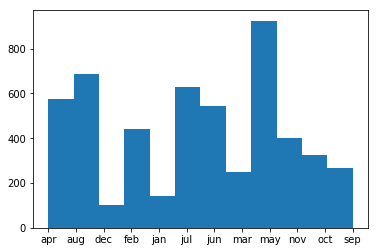

In [26]:
df4 = df[(df["outcome"]=="yes")].copy()
plt.hist(df4["month"], bins=12)
plt.show()

In [27]:
print("in order to create better campaign we would like to find what are the high and low seasons - our thesis is that you can divide the months according to the success rates they had. as we can see from the histogram above, high season are spring and summer (april to august) and low season is three months before to three months after the holiday season of december")

in order to create better campaign we would like to find what are the high and low seasons - our thesis is that you can divide the months according to the success rates they had. as we can see from the histogram above, high season are spring and summer (april to august) and low season is three months before to three months after the holiday season of december


# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [14]:
print("pearson {0}".format(np.corrcoef(df["age"], df["balance"])[0,1]))
df.corr(method='spearman')

print("note that the table is for spearman and the number is for pearson!")

pearson 0.0977827393713475
note that the table is for spearman and the number is for pearson!


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [15]:
df.corr(method='pearson')

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts,isContactKnown,cat_age
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288,0.020132,0.974029
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674,0.037331,0.071613
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710,0.034103,-0.002238
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203,0.014379,-0.026436
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885,-0.162032,-0.039478
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000,0.154162,-0.018175
isContactKnown,0.020132,0.037331,0.034103,0.014379,-0.162032,0.154162,1.000000,-0.031317
cat_age,0.974029,0.071613,-0.002238,-0.026436,-0.039478,-0.018175,-0.031317,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [16]:
cols = df.axes
for a in (cols[1]):
    a_u = df[a].unique()
    l = len(df[a])
    entropy = 0
    for val in a_u:
        prob = len(df[df[a] == val])/l
        if prob==0:
            continue
        entropy = entropy + prob*math.log(prob,2)
    entropy = (-1)*entropy
    print("the entropy for {0} is {1}".format(a,entropy))

print("balance has the biggest entropy!")

the entropy for age is 5.31996538110841
the entropy for job is 3.055352981989424
the entropy for marital is 1.3152704429934163
the entropy for education is 1.61490199754348
the entropy for default_credit is 0.13021221197171914
the entropy for balance is 11.237295205624045
the entropy for housing_loan is 0.9909848414082717
the entropy for personal_loan is 0.6348511238851708
the entropy for contact is 1.1775253842799875
the entropy for day is 4.838726650233829
the entropy for month is 2.937380670052729
the entropy for duration is 9.313764218181623
the entropy for campaign is 2.5433971519356153
the entropy for days_from_last_contact is 1.9429380396645335
the entropy for previous_campaign_contacts is 1.1954128174159335
the entropy for previous_campaign_outcome is 0.9370151397592825
the entropy for outcome is 0.5206312212538164
the entropy for isContactKnown is 0.866101498594268
the entropy for cat_age is 2.5467361730271976
balance has the biggest entropy!


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [17]:
cols = df.axes
for a in (cols[1]):
    if a=='outcome':
        continue
    print("mutual info between {0} and outcome is {1}".format(a,metrics.adjusted_mutual_info_score(df[a],df['outcome'])))

print("the highest mutual information to the outcome colomn is previous_campaing_outcome")
    

mutual info between age and outcome is 0.0032684014818774015
mutual info between job and outcome is 0.003845008068025555
mutual info between marital and outcome is 0.0022805750025279817
mutual info between education and outcome is 0.002291539454757275
mutual info between default_credit and outcome is 0.0007846574515351226
mutual info between balance and outcome is 0.0028813212917041696
mutual info between housing_loan and outcome is 0.014038572036439748
mutual info between personal_loan and outcome is 0.0059526886103268015
mutual info between contact and outcome is 0.016668840749456352
mutual info between day and outcome is 0.0017176083437520809
mutual info between month and outcome is 0.011900945399294614
mutual info between duration and outcome is 0.011603753892961834
mutual info between campaign and outcome is 0.002309979091861524
mutual info between days_from_last_contact and outcome is -0.0017567118960256515
mutual info between previous_campaign_contacts and outcome is 0.014929471

# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

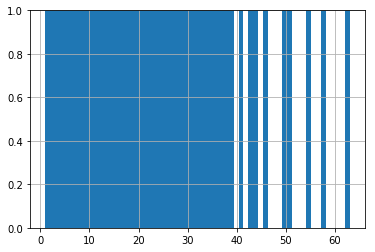

The campaigns, by nature, should have consecutive numbering. They are consecutive 1-39 but several (like 40) are missing. Meaning some campaigns are omitted or their numbering is wrong


In [30]:
df3 = df.copy()
df3['campaign'] = df3['campaign'].astype('int64')
ax = df3['campaign'].hist(bins=63)
ax.set_ylim(0, 1)
plt.show()
print("The campaigns, by nature, should have consecutive numbering. They are consecutive 1-39 but several (like 40) are missing. Meaning some campaigns are omitted or their numbering is wrong")

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

In [53]:
df5 = df["days_from_last_contact"].copy()
df5 = df5.dropna(axis=0, how='any')
low = min(df5)
high = max(df5)

df5 = df5.apply(lambda x: (x-low)/(high-low))

display(df5)

24060    0.172414
24062    0.189655
24064    0.103448
24072    0.097701
24077    0.163218
24080    0.167816
24086    0.101149
24122    0.159770
24127    0.201149
24136    0.114943
24151    0.198851
24160    0.194253
24165    0.190805
24170    0.198851
24184    0.222989
24186    0.188506
24187    0.147126
24189    0.214943
24198    0.224138
24203    0.196552
24207    0.134483
24208    0.190805
24230    0.135632
24234    0.118391
24236    0.195402
24238    0.133333
24239    0.187356
24250    0.150575
24253    0.147126
24254    0.149425
           ...   
45168    0.064368
45169    0.262069
45170    0.125287
45171    0.636782
45172    0.104598
45173    0.118391
45174    0.104598
45175    0.105747
45177    0.428736
45178    0.104598
45179    0.113793
45180    0.029885
45181    0.134483
45182    0.213793
45183    0.109195
45184    0.024138
45185    0.104598
45186    0.118391
45188    0.631034
45189    0.104598
45190    0.214943
45191    0.209195
45193    0.036782
45194    0.213793
45195    0

In [37]:
print("from calss or research online since we have all the data of the features (we were not required to complete values) the standart normalization method is min max. since we don't have negative numbers, we will do normalization to 0 to 1")

from calss or research online since we have all the data of the features (we were not required to complete values) the standart normalization method is min max. since we don't have negative numbers, we will do normalization to 0 to 1
